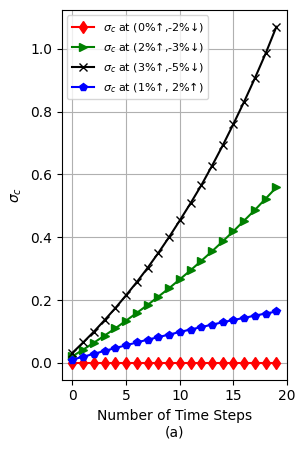

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np


#for sigma_customer=(n_kt/n_t)*(math.exp((n_t_1-n_t)/(n_t)))
timestep=np.arange(20) #number of time steps(rounds)=(year*month)/(period_in_months)

N=1200 

custlist33 =[]  #n_t
custlist53 =[]
custlist55 =[]
custlist22 =[]

custlist33.append(N)
custlist53.append(N)
custlist55.append(N)
custlist22.append(N)

valList33 =[]  
valList53 =[]
valList55 =[]
valList22 =[]

demand_33=0  #n_kt
demand_53=0
demand_55=0
demand_22=0


for i in timestep:
    demand_33 +=round(int(custlist33[i])*0) #customer demand for 5G increased by 0%
    demand_53 +=round(int(custlist53[i])*0.02) #customer demand for 5G increased by 2%
    demand_55 += round(int(custlist55[i]) * 0.03) #customer demand for 5G increased by 3%
    demand_22 += round(int(custlist22[i]) * 0.01) #customer demand for 5G increased by 1%

    next_cust33=round(int(custlist33[i])*0.98)  #next_cust=n_t_plus_1, total customer decreases by 2%
    next_cust53=round(int(custlist53[i])*0.97) #total customer decreases by 3%
    next_cust55=round(int(custlist55[i])*0.95) #total customer decreases by 5%
    next_cust22=round(int(custlist22[i])*1.02) #total customer increases by 2%

    sigma_c33 = demand_33/custlist33[i]*np.exp((custlist33[i]-next_cust33)/custlist33[i])
    sigma_c53 = demand_53 / custlist53[i] * np.exp((custlist53[i] - next_cust53) / custlist53[i])
    sigma_c55 = demand_55 / custlist55[i] * np.exp((custlist55[i] - next_cust55) / custlist55[i])
    sigma_c22 = demand_22 / custlist22[i] * np.exp((custlist22[i] - next_cust22) / custlist22[i])

    valList33.append(sigma_c33)
    valList53.append(sigma_c53)
    valList55.append(sigma_c55)
    valList22.append(sigma_c22)

    custlist33.append(next_cust33)
    custlist53.append(next_cust53)
    custlist55.append(next_cust55)
    custlist22.append(next_cust22)

custlist33.pop()
custlist53.pop()
custlist55.pop()
custlist22.pop()

plt.subplot(1, 2, 1)
plt.plot(timestep, valList33, '-dr', label='$\sigma_c$ at (0%$\u2191$,-2%$\u2193$)')
plt.plot(timestep, valList53, '->g', label='$\sigma_c$ at (2%$\u2191$,-3%$\u2193$)')
plt.plot(timestep, valList55, '-xk', label='$\sigma_c$ at (3%$\u2191$,-5%$\u2193$)')
plt.plot(timestep, valList22, '-pb', label='$\sigma_c$ at (1%$\u2191$, 2%$\u2191$)')
plt.xlabel('Number of Time Steps\n(a)')
plt.ylabel(ylabel='$\sigma_c$')
plt.xlim(-1,20)
font_props = fm.FontProperties(size=8)  # Adjust the size value as desired
plt.legend(prop=font_props)
plt.grid(True)





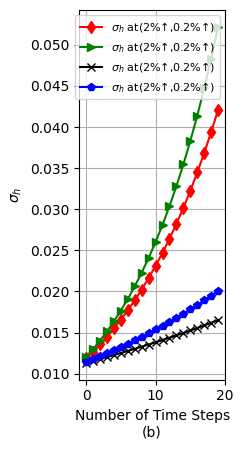

In [2]:
#for sigma_h=(HR_5G/HR_all)*(B_t/B_c)
HR_all=120

##1
HR_5G=2
B_t=30
B_c=45

hrval22=[]
for hr6 in timestep:
    B_t+=B_t*0.02 #available budget increased by 2%
    B_c+=B_c*0.002 #migration cost increased by 0.2%
    HR_5G+=HR_5G/20 #steady increment in 5G capable Human Resource, ?normalized using time steps?
    valhr=HR_5G*B_t/(HR_all*B_c) #BRD sir has used hr6 in place of HR_5G in this expression, same meaning, but slower increment in 5G HR
    hrval22.append(valhr)

plt.subplot(1, 3, 3)


##2
HR_5G=2
B_t=30
B_c=45

hrval221=[]
for hr6 in timestep:
    B_t+=B_t*0.03 
    B_c+=B_c*0.001 
    HR_5G+=HR_5G/20
    valhr=HR_5G*B_t/(HR_all*B_c) 
    hrval221.append(valhr)



##3
HR_5G=2
B_t=30
B_c=45

hrval52=[]
for hr6 in timestep:
    B_t+=B_t*0.02 
    B_c+=B_c*0.05 
    HR_5G+=HR_5G/20
    valhr=HR_5G*B_t/(HR_all*B_c) 
    hrval52.append(valhr)



##4
HR_5G=2
B_t=30
B_c=45

hrval521=[]
for hr6 in timestep:
    B_t+=B_t*0.03 
    B_c+=B_c*0.05
    HR_5G+=HR_5G/20
    valhr=HR_5G*B_t/(HR_all*B_c) 
    hrval521.append(valhr)

plt.subplot(1, 3, 3)

plt.plot(timestep, hrval22, '-dr', label='$\sigma_{h}$ at(2%$\u2191$,0.2%$\u2191$)')
plt.plot(timestep, hrval221, '->g', label='$\sigma_{h}$ at(2%$\u2191$,0.2%$\u2191$)') #will update legend values later
plt.plot(timestep, hrval52, '-xk', label='$\sigma_{h}$ at(2%$\u2191$,0.2%$\u2191$)')
plt.plot(timestep, hrval521, '-pb', label='$\sigma_{h}$ at(2%$\u2191$,0.2%$\u2191$)')

plt.xlabel('Number of Time Steps\n(b)')
plt.ylabel(ylabel='$\sigma_{h}$')
plt.xlim(-1,20)
font_props = fm.FontProperties(size=8)  # Adjust the size value as desired
plt.legend(prop=font_props)
plt.grid(True)
plt.show()


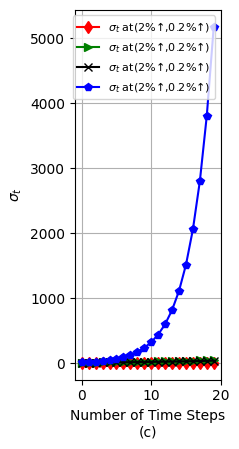

In [3]:
#for sigma_t=(P_area/C_area)*((BW_h)/(BW_h+BW_l))
##1
BW_h=8 #in GHz
BW_l=0.9

P_area=125 #projected coverage area in meters squared
C_area=100 #cuurent coverage area in meters squared


BW_area_1=[]
for hr6 in timestep:
    BW_h+=BW_h*0.1 #5G Bandwidth increased by 10%
    BW_l+=BW_l*0.002 #4G bandwidth increased by 0.2%
    P_area+=P_area*0.01 #increment in projected area by 1%
    C_area+=C_area*0.1 #increment in coverage area by 10%
    #val=(P_area/C_area)*((BW_h)/(BW_h+BW_l)) #this gave exponentially decreasing type of curve 
    val=(P_area/C_area)*((BW_h-BW_l)/(BW_l))  #this gave rising curve, need to adjust increment rates for better graphs
    BW_area_1.append(val)

plt.subplot(1, 3, 3)

##2
BW_h=8 #in GHz
BW_l=0.9

P_area=125 #projected coverage area in meters squared
C_area=100 #cuurent coverage area in meters squared


BW_area_2=[]
for hr6 in timestep:
    BW_h+=BW_h*0.2 
    BW_l+=BW_l*0.001 
    P_area+=P_area*0.04 
    C_area+=C_area*0.15 
    val=(P_area/C_area)*((BW_h-BW_l)/(BW_l)) 
    BW_area_2.append(val)

plt.subplot(1, 3, 3)

##3
BW_h=8 #in GHz
BW_l=0.9

P_area=125 #projected coverage area in meters squared
C_area=100 #cuurent coverage area in meters squared


BW_area_3=[]
for hr6 in timestep:
    BW_h+=BW_h*0.3 
    BW_l+=BW_l*0.003
    P_area+=P_area*0.03 
    C_area+=C_area*0.25 
    val=(P_area/C_area)*((BW_h-BW_l)/(BW_l)) 
    BW_area_3.append(val)

plt.subplot(1, 3, 3)

##4
BW_h=8 #in GHz
BW_l=0.9

P_area=125 #projected coverage area in meters squared
C_area=100 #cuurent coverage area in meters squared


BW_area_4=[]
for hr6 in timestep:
    BW_h+=BW_h*0.5
    BW_l+=BW_l*0.003 
    P_area+=P_area*0. 
    C_area+=C_area*0.1 
    val=(P_area/C_area)*((BW_h-BW_l)/(BW_l)) 
    BW_area_4.append(val)

plt.subplot(1, 3, 3)

plt.plot(timestep, BW_area_1, '-dr', label='$\sigma_{t}$ at(2%$\u2191$,0.2%$\u2191$)')
plt.plot(timestep, BW_area_2, '->g', label='$\sigma_{t}$ at(2%$\u2191$,0.2%$\u2191$)') #will update legend values later
plt.plot(timestep, BW_area_3, '-xk', label='$\sigma_{t}$ at(2%$\u2191$,0.2%$\u2191$)')
plt.plot(timestep, BW_area_4, '-pb', label='$\sigma_{t}$ at(2%$\u2191$,0.2%$\u2191$)')

plt.xlabel('Number of Time Steps\n(c)')
plt.ylabel(ylabel='$\sigma_t$')
plt.xlim(-1,20)
font_props = fm.FontProperties(size=8)  # Adjust the size value as desired
plt.legend(prop=font_props)
plt.grid(True)
plt.show()

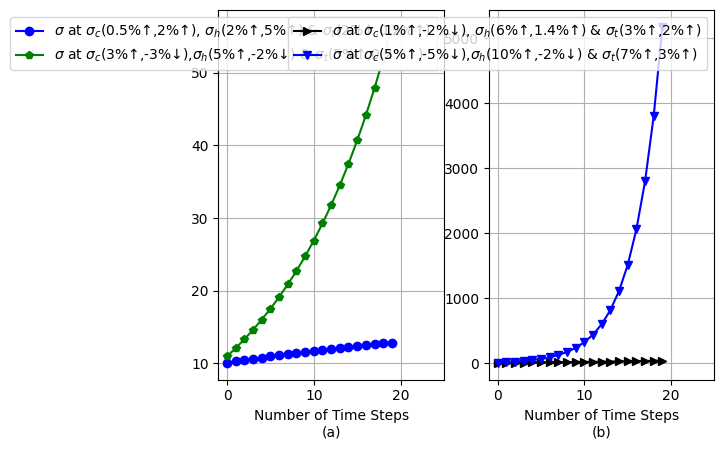

In [4]:
#for sigma_m=sigma_customer+sigma_hr+sigma_bw
sigma_m_1=[]
sigma_m_2=[]
sigma_m_3=[]
sigma_m_4=[]

for i in timestep:
    sigma_m_1.append(valList33[i]+hrval22[i]+BW_area_1[i])
    sigma_m_2.append(valList53[i]+hrval221[i]+BW_area_2[i])
    sigma_m_3.append(valList55[i]+hrval52[i]+BW_area_3[i])
    sigma_m_4.append(valList22[i]+hrval521[i]+BW_area_4[i])

plt.subplot(1,2,1)
plt.plot(timestep, sigma_m_1, '-ob', #legend rates are yet to be updated
         label='$\sigma$ at $\sigma_c$(0.5%$\u2191$,2%$\u2191$), $\sigma_h$(2%$\u2191$,5%$\u2191$) & $\sigma_t$(2%$\u2191$,0.2%$\u2191$)')
plt.plot(timestep, sigma_m_2, '-pg',
         label='$\sigma$ at $\sigma_c$(3%$\u2191$,-3%$\u2193$),$\sigma_h$(5%$\u2191$,-2%$\u2193$) & $\sigma_t$(5%$\u2191$,0.2%$\u2191$)')
plt.xlabel('Number of Time Steps\n(a)')
plt.xlim(-1,25)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(timestep, sigma_m_3, '->k',
         label='$\sigma$ at $\sigma_c$(1%$\u2191$,-2%$\u2193$), $\sigma_h$(6%$\u2191$,1.4%$\u2191$) & $\sigma_t$(3%$\u2191$,2%$\u2191$)')
plt.plot(timestep, sigma_m_4, '-vb',
         label='$\sigma$ at $\sigma_c$(5%$\u2191$,-5%$\u2193$),$\sigma_h$(10%$\u2191$,-2%$\u2193$) & $\sigma_t$(7%$\u2191$,3%$\u2191$)')
plt.xlabel('Number of Time Steps\n(b)')
plt.xlim(-1,25)
plt.legend()
plt.grid(True)

plt.show()



[1.9999574152409512, 1.9999645770095436, 1.999970329978149, 1.9999749922223886, 1.9999788016500197, 1.9999819380671644, 1.999984538709771, 1.9999867093004493, 1.9999885320050113, 1.9999900712167675, 1.9999913778025566, 1.9999924922483805, 1.9999934470102794, 1.999994268285894, 1.9999949773600734, 1.999995591634657, 1.9999961254222356, 1.999996590562182, 1.999996996901877, 1.9999973526749855]
[10.063971551845805, 10.248114077084756, 10.425343716729746, 10.596298668931352, 10.761566011863804, 10.921685930595688, 11.077155600929446, 11.228432758466914, 11.3759389788594, 11.520062693090942, 11.661161959707027, 11.799567014124534, 11.935582613528068, 12.06949019436235, 12.201549858058074, 12.332002199370217, 12.461069990553776, 12.588959733543664, 12.715863091335724, 12.841958208876994]


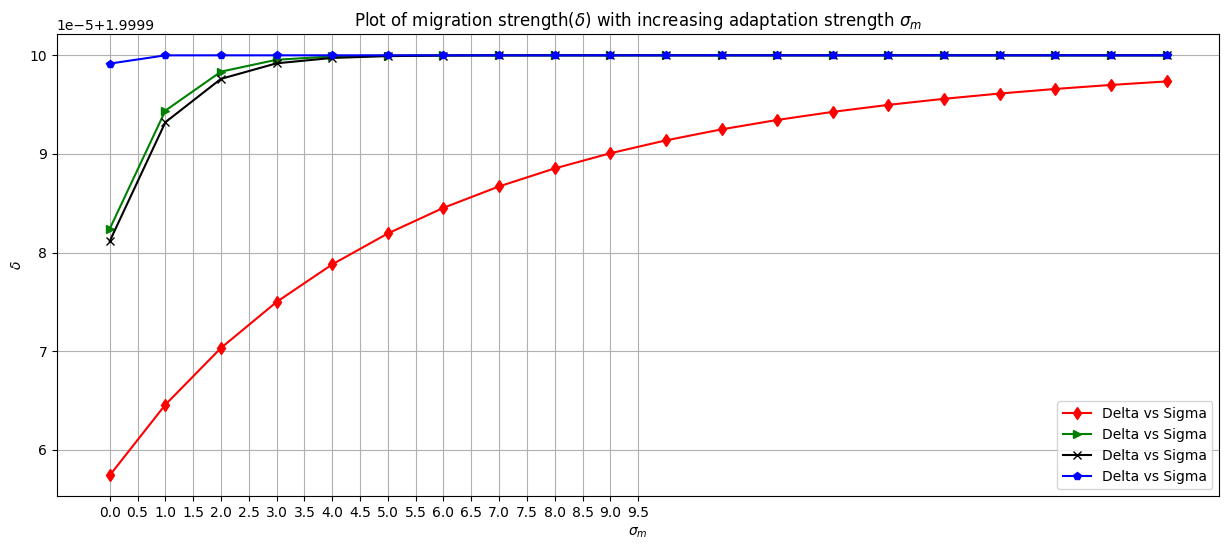

In [42]:
#for fitness multiplier delta. Needs further optimization of values of sigma_m 
delta_1=[]
delta_2=[]
delta_3=[]
delta_4=[]

for i in timestep:
    delta_1.append(1+1/(1+np.exp(-sigma_m_1[i])))   #need to optimize sigma_m for better delta graph, also probably need to normalize delta to restrict #values between 0 and 1
    delta_2.append(1+1/(1+np.exp(-sigma_m_2[i])))
    delta_3.append(1+1/(1+np.exp(-sigma_m_3[i])))
    delta_4.append(1+1/(1+np.exp(-sigma_m_4[i])))



print(delta_1)
print(sigma_m_1)

plt.figure(figsize=(15, 6))
#plt.plot(sigma_m_1, delta_1, '-dr', label='Delta vs Sigma')
#plt.plot(sigma_m_2, delta_2, '->g', label='Delta vs Sigma')
#plt.plot(sigma_m_3, delta_3, '-xk', label='Delta vs Sigma')
#plt.plot(sigma_m_4, delta_4, '-pb', label='Delta vs Sigma')
plt.plot(timestep, delta_1, '-dr', label='Delta vs Sigma') #sir ko sodip6 wala paper ma x-axis ma 24 timesteps jasto rakheko cha, yet theory ma chai sigma_m vanera #mention gareko cha. when using sigma_m for x axis, desired nature of curve is not obtained.
plt.plot(timestep, delta_2, '->g', label='Delta vs Sigma')
plt.plot(timestep, delta_3, '-xk', label='Delta vs Sigma')
plt.plot(timestep, delta_4, '-pb', label='Delta vs Sigma')
x_axis=[x * 0.5 for x in range(20)]
plt.xlabel('$\sigma_{m}$')
plt.ylabel('$\delta$')
plt.title('Plot of migration strength($\delta$) with increasing adaptation strength $\sigma_{m}$')
plt.xticks(x_axis)  # Creates ticks from 0 to 10 with a step of 0.5
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# utility graph
#we haven't calculated utility